In [4]:
#!/usr/bin/env python

import numpy as np
import os
from shapely import geometry
import tkinter
import matplotlib.pyplot as plt
from netCDF4 import Dataset

from gnssr.tds.tds_data import *
from gnssr.utils import *
from gnssr.targets import *
from gnssr.tds.search_target.cdf4_search import *



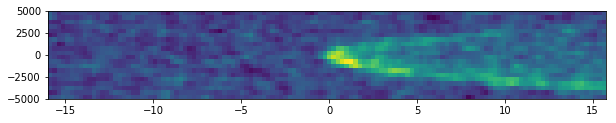

In [5]:
# Di Simone
file_root_name = 'raw/L1B/2015-04-01-H00'
target = targets['hibernia']
group = '000095'
index = 525

tds = tds_data(file_root_name)
tds.set_group_index(group, index)
tds.plot_ddm()

In [11]:
print(tds.rootgrp.groups[tds.group].variables['IntegrationMidPointTime'][tds.index].data)
print(tds.metagrp.groups[tds.group].variables['IntegrationMidPointTime'][tds.index].data)

736055.013629537
736055.013629537


In [14]:
code_delay_spacing_samples_between_pixels = tds.metagrp.groups[tds.group]
print(code_delay_spacing_samples_between_pixels)

<class 'netCDF4._netCDF4.Group'>
group /000095:
    TrackID: 95
    DataTag: 4
    PtrId: 365
    ReflectionChannelNumber: 1
    MasterChannelNumber: 12
    PRN: 11
    SVN: 46
    GnssBlock: 5
    GnssBlock_units: SSTL.ZTCDataMergeTools.TransmitterCorrections+GPSBlockEnum>0:Unknown,1:BlockI,2:BlockII,3:BlockIIA,4:BlockIIR,5:BlockIIR_A,6:BlockIIR_B,7:BlockIIR_M,8:BlockIIF
    FrontEnd: 1
    FrontEnd_units: SSTL.ZTCDataMergeTools.TrackMetaDataHeader+FrontEndEnum>0:ZenithL1_DF,1:NadirL1,2:ZenithL1_CLAP,3:ZenithL1_CAP,4:Unknown5,5:Unknown6,6:ZenithL2_DF,7:NadirL2,8:Unknown
    SignalType: 1
    SignalType_units: SSTL.ZTCDataMergeTools.TrackMetaDataHeader+SignalTypeEnum>0:NO_SIGNAL,1:GPS_L1
    SamplingFrequency: 16367000.0
    AllocationMode: 1
    AllocationMode_units: SSTL.ZTCDataMergeTools.TrackMetaDataHeader+AllocationModeEnum>0:Manual,1:Auto,2:Unknown
    TrackingMode: 2
    TrackingMode_units: SSTL.ZTCStreamProcessing.DDMTrackHeader+TrackingModeEnum>0:Idle,1:DirectSignalOverride,2: